In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data.csv')
df

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


In [9]:
df.columns

Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')

## a. Measure the dispersion in both and interpret the results. 

In [10]:
before = df[' Blood Pressure Before (mmHg)'].max() - df[' Blood Pressure Before (mmHg)'].min()
print(f"Range for 'Blood pressure before': {before}")

Range for 'Blood pressure before': 28


In [11]:
after = df[' Blood Pressure After (mmHg)'].max() - df[' Blood Pressure After (mmHg)'].min()
print(f"Range for 'Blood pressure after': {after}")

Range for 'Blood pressure after': 23


### '''The range measures the spread of the data. In this case, the 'Blood Pressure Before' has a larger range of 28 mmHg compared to 'Blood Pressure After,' which has a range of 23 mmHg. This indicates that the values in the 'Blood Pressure Before' column are more dispersed or spread out compared to the 'Blood Pressure After' column.'''

In [18]:
std_before = np.std(df[' Blood Pressure Before (mmHg)'])
std_after = np.std(df[' Blood Pressure After (mmHg)'])

var_before = np.var(df[' Blood Pressure Before (mmHg)'])
var_after = np.var(df[' Blood Pressure After (mmHg)'])

print("Standard Deviation:")
print("Standard Deviation for 'Blood Pressure Before':", std_before)
print("Standard Deviation for 'Blood Pressure After':", std_after)
print("----------------------------------------------------------------")
print("Variance:")
print("Variance for 'Blood Pressure Before':", var_before)
print("Variance for 'Blood Pressure After':", var_after)

Standard Deviation:
Standard Deviation for 'Blood Pressure Before': 6.5652037287505385
Standard Deviation for 'Blood Pressure After': 6.853495458523338
----------------------------------------------------------------
Variance:
Variance for 'Blood Pressure Before': 43.10189999999998
Variance for 'Blood Pressure After': 46.97040000000002


## b. Calculate the mean and 5% confidence interval and plot it in a graph.

In [20]:
mean_before = np.mean(df[' Blood Pressure Before (mmHg)'])
mean_after = np.mean(df[' Blood Pressure After (mmHg)'])

std_before = np.std(df[' Blood Pressure Before (mmHg)'])
std_after = np.std(df[' Blood Pressure After (mmHg)'])

se_before = std_before / np.sqrt(len(df[' Blood Pressure Before (mmHg)']))
se_after = std_after / np.sqrt(len(df[' Blood Pressure After (mmHg)']))

ci_before = stats.t.interval(0.95, len(df[' Blood Pressure Before (mmHg)']) - 1, loc=mean_before, scale=se_before)
ci_after = stats.t.interval(0.95, len(df[' Blood Pressure After (mmHg)']) - 1, loc=mean_after, scale=se_after)

In [21]:
print("Mean and Confidence Interval:")
print("Mean 'Blood Pressure Before':", mean_before)
print("Confidence Interval 'Blood Pressure Before':", ci_before)
print("Mean 'Blood Pressure After':", mean_after)
print("Confidence Interval 'Blood Pressure After':", ci_after)

Mean and Confidence Interval:
Mean 'Blood Pressure Before': 133.91
Confidence Interval 'Blood Pressure Before': (132.6073211471305, 135.2126788528695)
Mean 'Blood Pressure After': 128.36
Confidence Interval 'Blood Pressure After': (127.00011781341104, 129.719882186589)


### The mean 'Blood Pressure Before' is approximately 133.91 mmHg with a 5% confidence interval of (132.607, 135.2127) mmHg. This means that we are 95% confident that the true mean lies within this interval.
### Similarly, The mean 'Blood Pressure After' is approximately 128.36 mmHg with a 5% confidence interval of (127, 129.7199) mmHg. This means that we are 95% confident that the true mean lies within this interval.

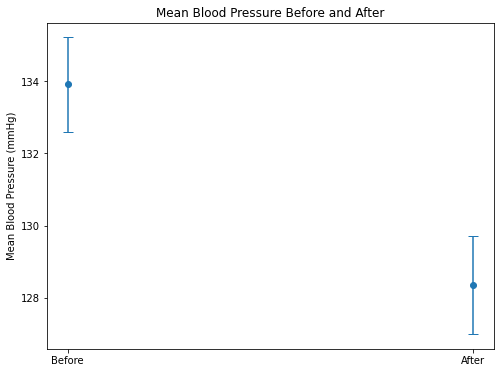

In [22]:
plt.figure(figsize=(8, 6))
plt.errorbar(['Before', 'After'], [mean_before, mean_after], yerr=[ci_before[1] - mean_before, ci_after[1] - mean_after],
             marker='o', linestyle='', capsize=5)
plt.ylabel("Mean Blood Pressure (mmHg)")
plt.title("Mean Blood Pressure Before and After")
plt.show()

## c. Calculate the Mean absolute deviation and Standard deviation and interpret the results. 

In [23]:
mad_before = np.mean(np.abs(df[' Blood Pressure Before (mmHg)'] - mean_before))
mad_after = np.mean(np.abs(df[' Blood Pressure After (mmHg)'] - mean_after))

In [24]:
print("Mean Absolute Deviation:")
print("MAD for 'Blood Pressure Before':", mad_before)
print("MAD for 'Blood Pressure After':", mad_after)

Mean Absolute Deviation:
MAD for 'Blood Pressure Before': 5.7118
MAD for 'Blood Pressure After': 5.9


In [26]:
std_before = np.std(df[' Blood Pressure Before (mmHg)'])
std_after = np.std(df[' Blood Pressure After (mmHg)'])

print("Standard Deviation:")
print("Standard Deviation for 'Blood Pressure Before':", std_before)
print("Standard Deviation for 'Blood Pressure After':", std_after)

Standard Deviation:
Standard Deviation for 'Blood Pressure Before': 6.5652037287505385
Standard Deviation for 'Blood Pressure After': 6.853495458523338


### The MAD measures the average deviation of each data point from the mean. For 'Blood Pressure Before,' the MAD is approximately 5.7118 mmHg, while the SD is 6.5652 mmHg. This indicates that, on average, the values in the 'Blood Pressure Before' column deviate by approximately 5.7118 mmHg from the mean, and the overall variability or dispersion of the data is captured by the SD of 6.562 mmHg.

### The MAD measures the average deviation of each data point from the mean. For 'Blood PressureAfter,' the MAD is approximately 5.9 mmHg, while the SD is 6.8535 mmHg. This indicates that, on average, the values in the 'Blood Pressure After' column deviate by approximately 5.9 mmHg from the mean, and the overall variability or dispersion of the data is captured by the SD of 6.8535 mmHg.

## d. Calculate the correlation coefficient and check the significance of it at 1% level of significance. 

In [28]:
correlation_coef, p_value = stats.pearsonr(df[' Blood Pressure Before (mmHg)'], df[' Blood Pressure After (mmHg)'])
print("Correlation Coefficient:")
print("Correlation Coefficient:", correlation_coef)
print("p-value:", p_value)

# Check significance at 1% level
alpha = 0.01
if p_value < alpha:
    print("There is a significant correlation between 'Blood Pressure Before' and 'Blood Pressure After' at the 1% level of significance.")
else:
    print("There is no significant correlation between 'Blood Pressure Before' and 'Blood Pressure After' at the 1% level of significance.")

Correlation Coefficient:
Correlation Coefficient: 0.9779485966556019
p-value: 1.8097381433068541e-68
There is a significant correlation between 'Blood Pressure Before' and 'Blood Pressure After' at the 1% level of significance.
